In [23]:
from langchain_groq import ChatGroq
from typing import TypedDict
from typing_extensions import Annotated
from langgraph.graph.message import add_messages, AnyMessage
from langgraph.graph import StateGraph, START, END

In [2]:
llm = ChatGroq(model = "llama-3.3-70b-versatile", groq_api_key = "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")

In [20]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [21]:
def llm_chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

In [24]:
builder = StateGraph(State)

builder.add_node("llm_chatbot", llm_chatbot)

builder.add_edge(START, "llm_chatbot")
builder.add_edge("llm_chatbot", END)

graph = builder.compile()

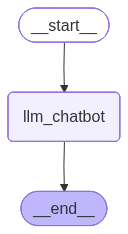

In [26]:
graph

In [28]:
message = graph.invoke({"messages": "hi, how are you?"})
for m in message["messages"]:
    m.pretty_print()

================================ Human Message =================================

hi, how are you?
================================== Ai Message ==================================

Hello. I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you. How can I help you today?


In [31]:
print(message["messages"][-1].content)

Hello. I'm just a language model, so I don't have feelings or emotions like humans do, but I'm functioning properly and ready to assist you. How can I help you today?


In [32]:
for event in graph.stream({"messages": "Hi, how are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

I'm just a language model, so I don't have emotions or feelings like humans do, but I'm functioning properly and ready to help with any questions or tasks you might have. How about you? How's your day going so far?
